Importing The Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

Read The Dataset

In [ ]:
df=pd.read_csv("/content/insurance .csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.shape


(1338, 7)

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
df["charges"].max()

63770.42801

Stastical Analysis

In [ ]:
numeric_columns = ['age', 'bmi', 'children', 'charges']

In [ ]:
mean = df[numeric_columns].mean()
mean

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [ ]:
median = df[numeric_columns].median()
median

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [ ]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


Data Visualization

Univariate Analysis

<ipython-input-18-a1d1d0e2654e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

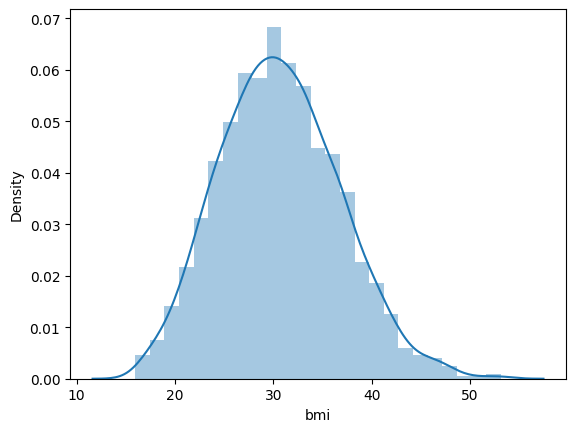

In [ ]:
sns.distplot(df['bmi'])

Bivariate Analysis

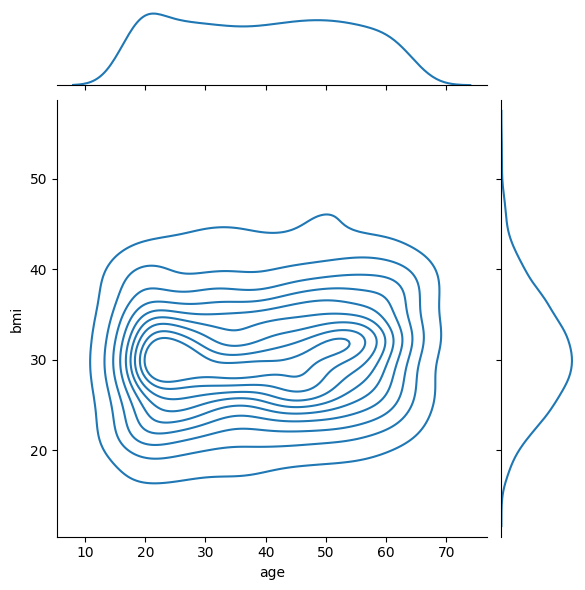

In [ ]:
sns.jointplot(x=df['age'], y=df['bmi'], kind="kde")

<Axes: xlabel='age', ylabel='charges'>

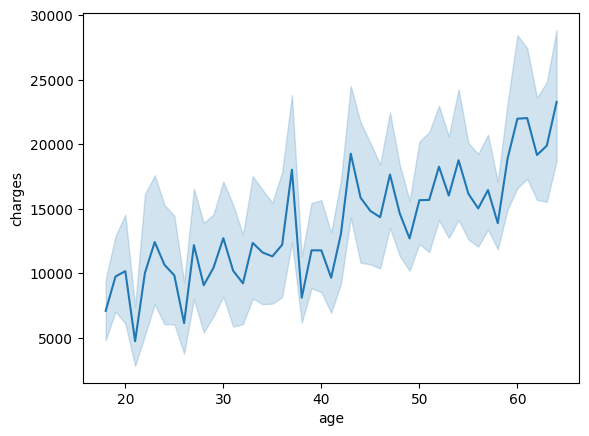

In [ ]:
sns.lineplot(x=df['age'], y=df['charges'])

<Axes: xlabel='charges', ylabel='bmi'>

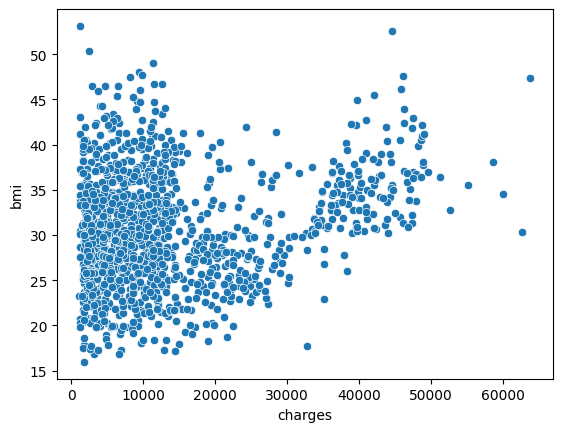

In [ ]:
sns.scatterplot(x='charges', y='bmi', data=df)

Detecting and Handling Outliers

<Axes: >

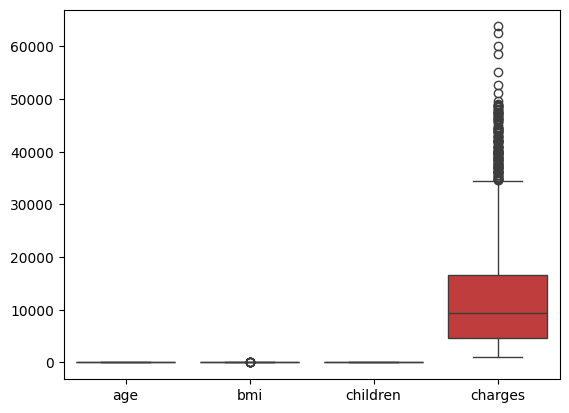

In [ ]:
sns.boxplot(df)

In [ ]:
IQR = df['bmi'].quantile(0.75)-df['bmi'].quantile(0.25)
IQR

8.3975

In [ ]:
lowerBound=df['bmi'].quantile(0.25)-(1.5*IQR)
lowerBound

13.7

In [ ]:
upperBound=df['bmi'].quantile(0.75)+(1.5*IQR)
upperBound

47.290000000000006

In [ ]:
df['bmi']=np.where(df['bmi']>upperBound,upperBound,df['bmi'])
df['bmi']=np.where(df['bmi']<lowerBound,lowerBound,df['bmi'])

<Axes: ylabel='bmi'>

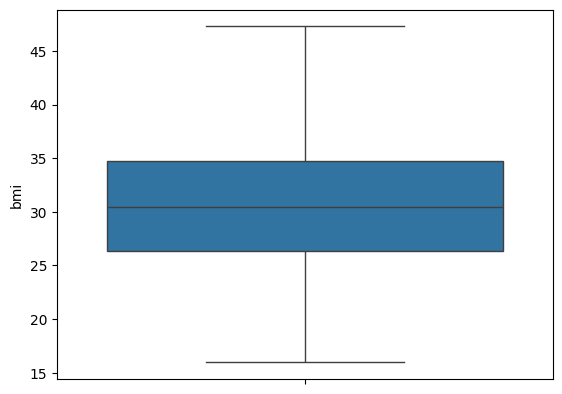

In [ ]:
sns.boxplot(df['bmi'])

<Axes: >

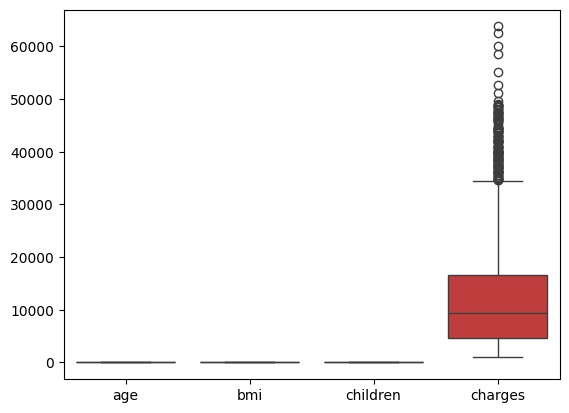

In [ ]:
sns.boxplot(df)

In [ ]:
IQR = df['charges'].quantile(0.75)-df['charges'].quantile(0.25)
IQR

11899.625365

In [ ]:
lowerBound=df['charges'].quantile(0.25)-(1.5*IQR)
lowerBound

-13109.1508975

In [ ]:
upperBound=df['charges'].quantile(0.75)+(1.5*IQR)
upperBound

34489.350562499996

In [ ]:
df['charges']=np.where(df['charges']>upperBound,upperBound,df['charges'])
df['charges']=np.where(df['charges']<lowerBound,lowerBound,df['charges'])

<Axes: ylabel='charges'>

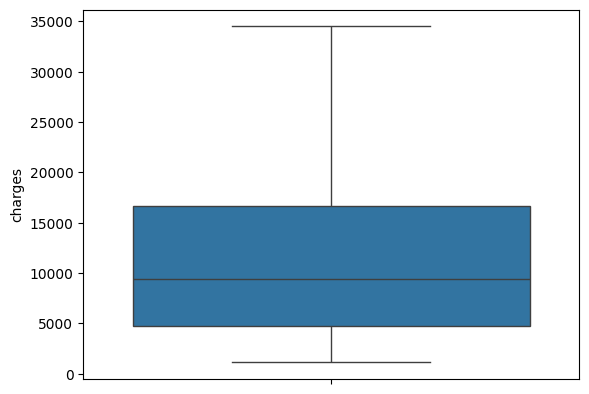

In [ ]:
sns.boxplot(df['charges'])

<Axes: >

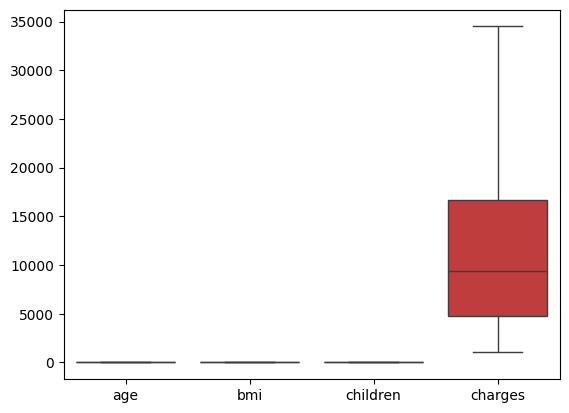

In [ ]:
sns.boxplot(df)

Descriptive Analysis

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.650034,1.094918,12479.369251
std,14.049960,6.056926,1.205493,10158.056096
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,47.290000,5.000000,34489.350562


Male: 676
Female: 662


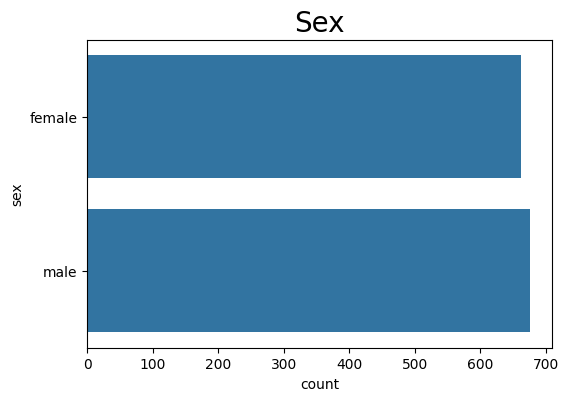

In [ ]:
print("Male:",df[df['sex']=='male'].shape[0])
print("Female:",df[df['sex']=='female'].shape[0])
plt.figure(figsize=(6,4))
sns.countplot(df['sex'])
plt.title('Sex',fontsize=20)
plt.show()

Distribution of Smokers

Smokers: 274
Non-Smokers: 1064


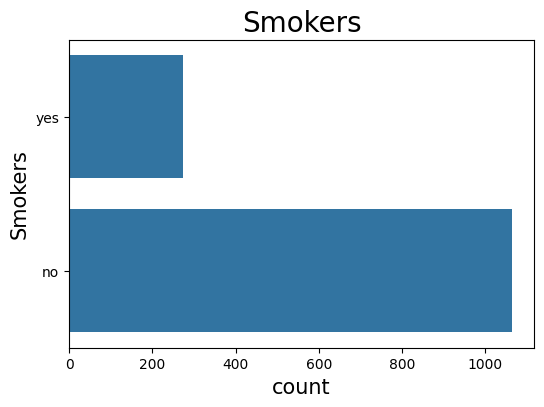

In [ ]:
print("Smokers:",df[df['smoker']=='yes'].shape[0])
print("Non-Smokers:",df[df['smoker']=='no'].shape[0])
plt.figure(figsize=(6,4))
sns.countplot(df['smoker'])
plt.title('Smokers',fontsize=20)
plt.xlabel('count',fontsize=15)
plt.ylabel('Smokers',fontsize=15)
plt.show()

Distribution of Region

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


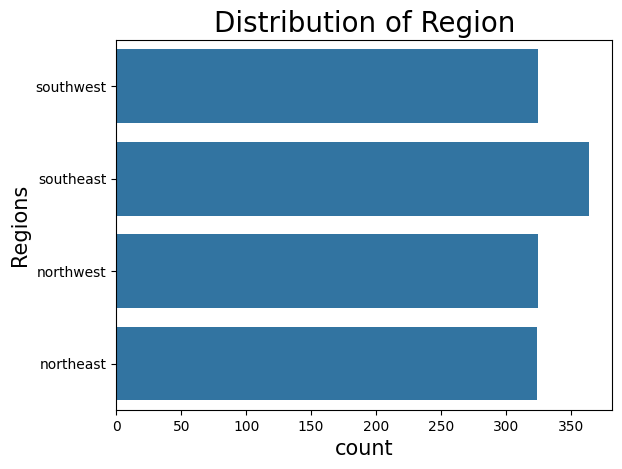

In [ ]:
print(df['region'].value_counts())
sns.countplot(df['region'])
plt.title('Distribution of Region',fontsize=20)
plt.xlabel('count',fontsize=15)
plt.ylabel('Regions',fontsize=15)
plt.show()

Cost vs Region

Text(0.5, 1.0, 'Cost vs Region')

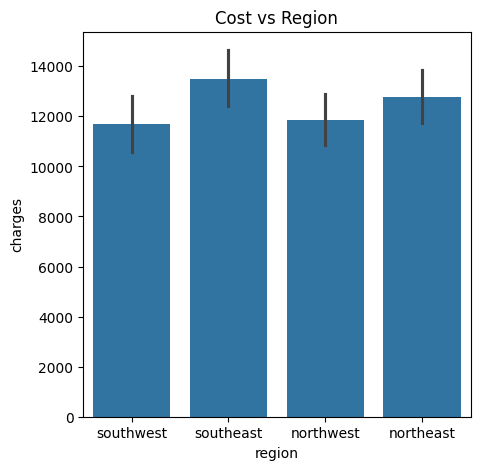

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='region',y='charges',data=df)
plt.title('Cost vs Region')

Data Preprocessing

Checking for Null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df[df.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


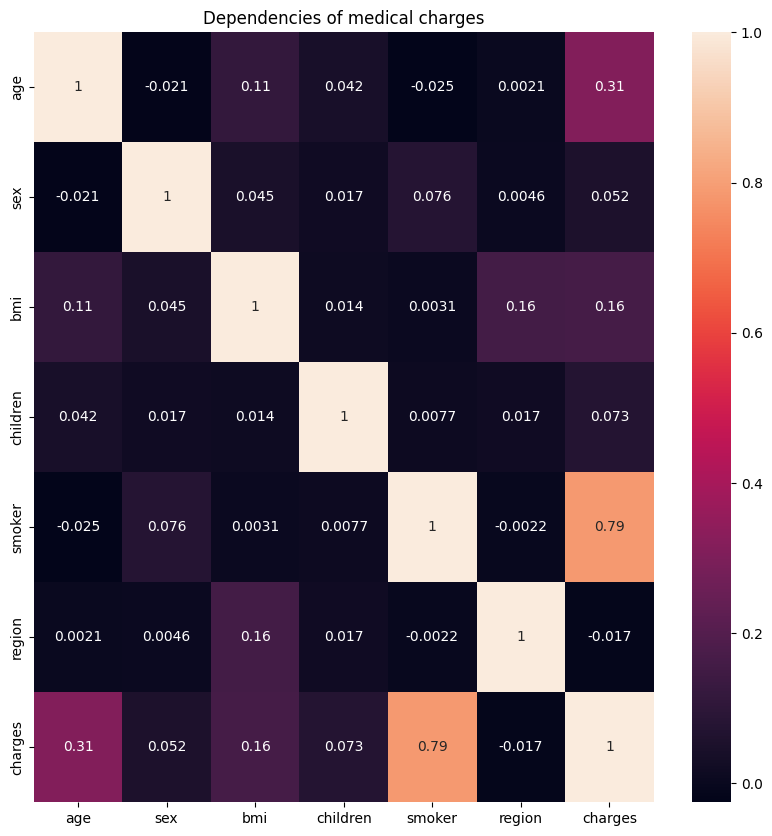

In [ ]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, ax=ax)
plt.title("Dependencies of medical charges")
plt.show()

Splitting of data

In [ ]:
X=df.drop(['charges'],axis=1)

In [ ]:
y=df['charges']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train

560      9193.838500
1285     8534.671800
1142    27117.993780
969      8596.827800
486     12475.351300
            ...     
1095     4561.188500
1130     8582.302300
1294    11931.125250
860     34489.350562
1126    10214.636000
Name: charges, Length: 1070, dtype: float64

Model Building

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred1=lr.predict(X_test)

In [ ]:
from sklearn import  metrics

In [ ]:
score1=metrics.r2_score(y_test,y_pred1)
print(score1)

0.7837015388200166


In [ ]:
s1=metrics.mean_absolute_error( y_test,y_pred1)
print(s1)

3320.557034987548


In [ ]:
rmse_lr=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
print("mean_squared_error",rmse_lr)

mean_squared_error 4845.6792366495965


In [ ]:
accuracy=lr.score(X_test,y_test)
print("-------Linear Regression-------")
print("model accuracy \t\t",accuracy)
print(f'Accuracy in percentage\t:{accuracy:.1%}')


-------Linear Regression-------
model accuracy 		 0.7837015388200166
Accuracy in percentage	:78.4%


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score # Import appropriate metrics for regression
from sklearn.model_selection import train_test_split
print("Regression Metrics:")
print("Mean absolute Error:", s1)
print("Root Mean Squared Error:", rmse_lr)
score1=metrics.r2_score(y_test,y_pred1)
print("R-squared:",score1)


Regression Metrics:
Mean absolute Error: 3320.557034987548
Root Mean Squared Error: 4845.6792366495965
R-squared: 0.7837015388200166


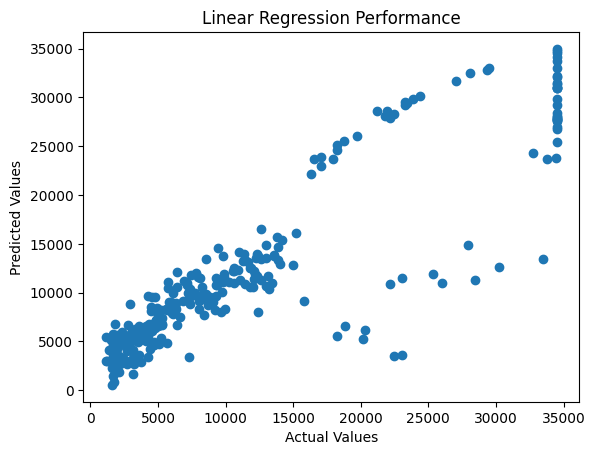

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Performance")
plt.show()


Support Vector MachineRegressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm= SVR()
svm.fit(X_train,y_train)

SVR()

In [ ]:
y_pred2=svm.predict(X_test)

In [ ]:
score2=metrics.r2_score(y_test,y_pred2)
print(score2)

-0.057306433750309305


In [ ]:
s2=metrics.mean_absolute_error( y_test,y_pred2)
print(s2)

7754.513457705959


In [ ]:
rmse_svm=np.sqrt(metrics.mean_squared_error(y_test,y_pred2))
print("root_mean_squared_error",rmse_svm)

root_mean_squared_error 10713.4262641038


In [ ]:
accuracy=svm.score(X_test,y_test)
print("-------Support Vector Machine-------")
print("model accuracy \t\t",accuracy)
print(f'Accuracy in percentage\t:{accuracy:.1%}')

-------Support Vector Machine-------
model accuracy 		 -0.057306433750309305
Accuracy in percentage	:-5.7%


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score # Import appropriate metrics for regression
from sklearn.model_selection import train_test_split
print("Regression Metrics:")
print("Mean absolute Error:", s2)
print("Root Mean Squared Error:", rmse_svm)
score2=metrics.r2_score(y_test,y_pred2)
print("R-squared:",score2)


Regression Metrics:
Mean absolute Error: 7754.513457705959
Root Mean Squared Error: 10713.4262641038
R-squared: -0.057306433750309305


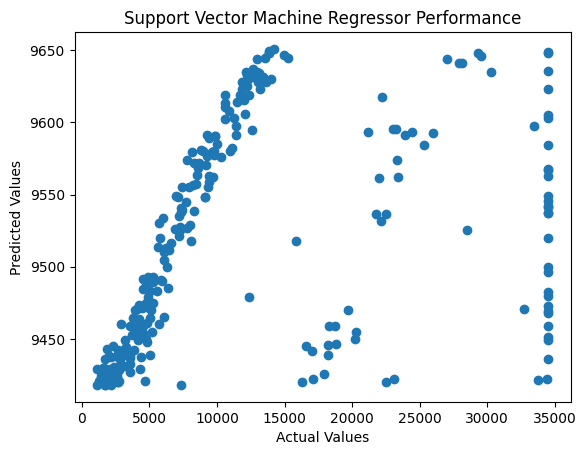

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Support Vector Machine Regressor Performance")
plt.show()

RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf= RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred3=rf.predict(X_test)

In [ ]:
score3=metrics.r2_score(y_test,y_pred3)
print(score3)

0.8302918166174308


In [ ]:
s3=metrics.mean_absolute_error( y_test,y_pred3)
print(s3)

2158.311786770744


In [ ]:
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test,y_pred3))
print("root_mean_squared_error",rmse_rf)

root_mean_squared_error 4292.193966762153


In [ ]:
accuracy=rf.score(X_test,y_test)
print("-------RandomForestRegressor-------")
print("model accuracy \t\t",accuracy)
print(f'Accuracy in percentage\t:{accuracy:.1%}')

-------RandomForestRegressor-------
model accuracy 		 0.8302918166174308
Accuracy in percentage	:83.0%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score # Import appropriate metrics for regression
from sklearn.model_selection import train_test_split
print("Regression Metrics:")
print("Mean absolute Error:", s3)
print("Root Mean Squared Error:", rmse_rf)
score3=metrics.r2_score(y_test,y_pred3)
print("R-squared:", score3)


Regression Metrics:
Mean absolute Error: 2158.311786770744
Root Mean Squared Error: 4292.193966762153
R-squared: 0.8302918166174308


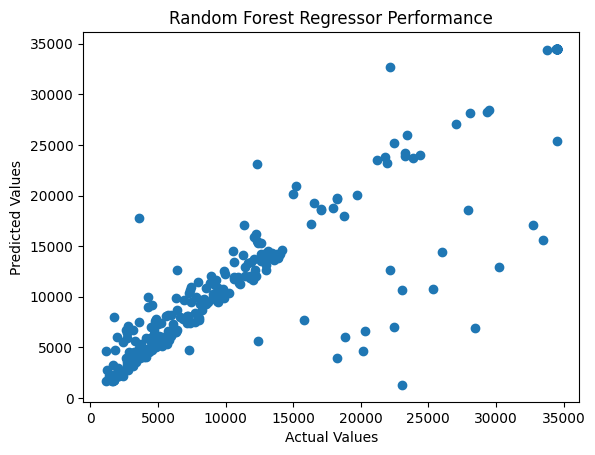

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor Performance")
plt.show()

GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb= GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred4=gb.predict(X_test)

In [ ]:
score4=metrics.r2_score(y_test,y_pred4)
print(score4)

0.8451154840835637


In [ ]:
s4=metrics.mean_absolute_error( y_test,y_pred4)
print(s4)

2174.9371457221414


In [ ]:
rmse_gb=np.sqrt(metrics.mean_squared_error(y_test,y_pred4))
print("root_mean_squared_error",rmse_gb)

root_mean_squared_error 4100.4540432147405


In [ ]:
accuracy=gb.score(X_test,y_test)
print("-------GradientBoostingRegressor-------")
print("model accuracy \t\t",accuracy)
print(f'Accuracy in percentage\t:{accuracy:.1%}')

-------GradientBoostingRegressor-------
model accuracy 		 0.8451154840835637
Accuracy in percentage	:84.5%


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score # Import appropriate metrics for regression
from sklearn.model_selection import train_test_split
print("Regression Metrics:")
print("Mean absolute Error:", s4)
print("Root Mean Squared Error:", rmse_gb)
score4=metrics.r2_score(y_test,y_pred4)
print("R-squared:", score4)


Regression Metrics:
Mean absolute Error: 2174.9371457221414
Root Mean Squared Error: 4100.4540432147405
R-squared: 0.8451154840835637


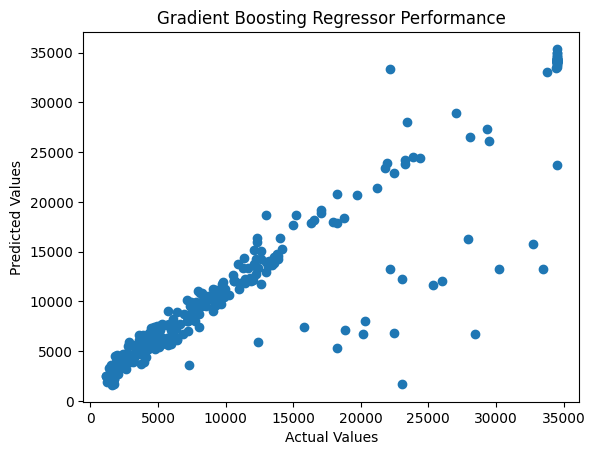

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred4)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor Performance")
plt.show()

Model Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Assuming X and y are your feature and target data respectively,
# which are not provided in the problem
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
df={'age':19,'sex':0,'bmi':27.9,'children':0,'smoker':1,'region':3}
df=pd.DataFrame(df,index=[0])
df

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3


In [ ]:
new_pred=rf.predict(df)
print(new_pred)

[17141.5437415]


Saving the Model

In [ ]:
import pickle
import warnings

In [ ]:
with open("rf.pkl","wb")as f:
  pickle.dump(rf,f)